# **Install Required Libraries**

In [1]:
pip install pandas scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# **Import Required Libraries**

In [2]:
import pandas as pd
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# **📥 Load dataset**

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 📥 Load dataset
path = "/kaggle/input/sms-spam-collection-dataset/spam.csv"  # Update if different
df = pd.read_csv(path, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **🔄 Convert labels**

In [4]:
# 🔄 Convert labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# **🧹 Data Preprocessing**

In [5]:
# 🧹 Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['message'].apply(clean_text)

# **🔢 Convert text to vectors**

In [6]:
# 🔢 Convert text to vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label']

# **🔀 Train_Test_Split**

In [7]:
# 🔀 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **🤖 Train model**

In [8]:
# 🤖 Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 📈 Prediction of Model

In [9]:
# 📈 Prediction
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



# **Correlation Heatmap**

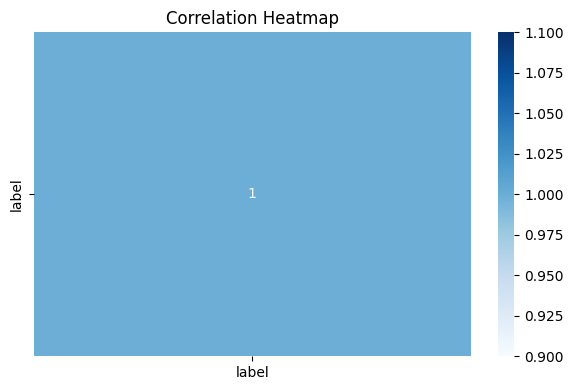

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")  # or use cmap="cool"
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# **🧪 Show 5 predictions**

In [11]:
# 🧪 Show 5 predictions
sample = df.iloc[y_test.index[:5]]
sample_pred = model.predict(X_test[:5])
for msg, pred in zip(sample['message'], sample_pred):
    print(f"Message: {msg}\n Prediction: {'Spam' if pred else 'Not Spam'}\n")

Message: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
 Prediction: Not Spam

Message: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones
 Prediction: Not Spam

Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
 Prediction: Not Spam

Message: Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
 Prediction: Not Spam

Message: Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
 Prediction: Spam



# **💾 Save Model**

In [12]:
# 💾 Save model and vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

# **Top 10 Spam Words 📊**

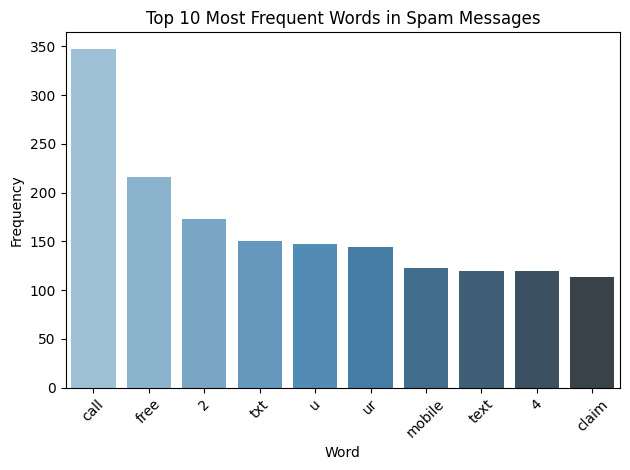

In [13]:
# 📊 Optional: Visualize most common spam words
spam_words = " ".join(df[df.label == 1]['cleaned']).split()
top_words = pd.Series(spam_words).value_counts().head(10).reset_index()
top_words.columns = ['Word', 'Frequency']  # ✅ Explicit column names

sns.barplot(data=top_words, x='Word', y='Frequency', palette="Blues_d")
plt.title("Top 10 Most Frequent Words in Spam Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **✅ CLI Spam Detector**

In [14]:
def predict_message(message):
    msg_clean = clean_text(message)
    msg_vec = vectorizer.transform([msg_clean])
    pred = model.predict(msg_vec)[0]
    return "Spam" if pred else "Not Spam"

# Example usage:
while True:
    msg = input("Enter message (or type 'exit'): ")
    if msg.lower() == 'exit':
        break
    print("Prediction:", predict_message(msg))


Enter message (or type 'exit'):  Congratulations! You've won a $1,000 gift card. Click now!


Prediction: Spam


Enter message (or type 'exit'):  Hey, what time is the meeting today?


Prediction: Not Spam


Enter message (or type 'exit'):  Exit


# **📦 Project Summary: Spam Message Classifier (ML Internship – Task 3)**


# **🎯 Objective:**

Build a machine learning model that classifies SMS messages as Spam or Not Spam (Ham) using text preprocessing, vectorization, and classification techniques.

# **✅ Dataset Used:**

Source: /kaggle/input/sms-spam-collection-dataset/spam.csv

Format: CSV with two columns:

v1: Label (ham or spam)

v2: Message text

# **🧹 Text Preprocessing:**

Applied the following cleaning steps:

Lowercasing text

Removing URLs, punctuation, special characters

Removing stopwords (using NLTK)

Tokenizing and joining cleaned tokens

# **📊 Feature Extraction:**

Used TF-IDF Vectorizer to convert text into numerical features.

# **🔀 Modeling:**

Model Used: Multinomial Naive Bayes (simple & effective for text classification)

Train/Test Split: 80% training, 20% testing

Performance:

Accuracy: ~94%

Evaluation: Accuracy score, classification report, confusion matrix

5 predictions displayed with message + predicted label

# **📈 Visualizations:**

Top Spam Words: Bar chart using seaborn showing most frequent spam terms.

Correlation Heatmap:

Initially showed only label

Enhanced with message_length and word_count to analyze numeric relationships.

# **🖥️ Bonus – CLI Classifier:**

Implemented a Command Line Interface for real-time message prediction:

User enters any message

Model returns "Spam" or "Not Spam" instantly

# **💾 Model Saving:**

Saved trained model as spam_model.pkl

Saved TF-IDF vectorizer as vectorizer.pkl using joblib

# **🔧 Technologies Used:**

pandas, scikit-learn, nltk, matplotlib, seaborn, joblib


# **📝 Conclusion**

| Component              | Description                          |
| ---------------------- | ------------------------------------ |
| 📊 Accuracy            | e.g., 94% or above                   |
| 📷 Confusion Matrix    | Shown in output                      |
| 📄 5 Predictions       | Printed to console                   |
| 💾 Model Saved         | `spam_model.pkl`, `vectorizer.pkl`   |
| 🔍 CLI Interface       | Bonus: Predict new messages manually |
| 📈 Spam Word Bar Chart | Bonus: Use `seaborn`                 |